##Nuevos Datos
Agregamos más datos a nuestro proyecto que nos ayuden en nuestro analisis y los analizaremos en busqueda de nulos o duplicados.

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
sns.set_theme(style="whitegrid", palette="rocket")

##Oferta laboral por ciudad

###Lectura de archivos

In [133]:
url='https://raw.githubusercontent.com/leoomc97/datasets_CoderHouse/main/monster_india.json'
respuesta=requests.get(url)
print(respuesta)

<Response [200]>


In [134]:
texto = respuesta.text
json.loads(texto)

Output hidden; open in https://colab.research.google.com to view.

In [135]:
jsondata = json.loads(texto)

In [136]:
df_work = pd.DataFrame.from_dict(jsondata)
df_work

,url,title,description,posted_at,crawled_at,_id,expires_at,job_type,company_name,qualifications,...,address_locality,address_region,address_country,postal_code,street_address,salary,units,currency,experience,months_of_experience
0,https://www.monsterindia.com/job/rm-retail-agr...,RM-Retail Agri,Job Description : A. Sourcing and Business Gen...,2021-07-27,"08/13/2021, 01:24:24",fde08100-4d8e-5e15-b206-909e6b84b063,2021-09-25,"Permanent Job,International,Full time",The HDFC Bank Limited,NA,...,Anjar,Gujarat,IN,NA,NA,Not disclosed,P.A.,INR,1-3 years,12
1,https://www.monsterindia.com/job/software-engi...,Software Engineer II,Position Type : Full time Type Of Hire : E...,2021-07-23,"08/13/2021, 01:24:24",cae70b5c-30a6-5326-8e21-e68d60ab4af8,2021-09-21,"Permanent Job,International,Full time",FIS Global Business Solutions India Private Li...,NA,...,Noida,Uttar Pradesh,IN,NA,NA,Not disclosed,P.A.,INR,Not Specified,
2,https://www.monsterindia.com/job/product-manag...,Product Manager – Mortgage %26 Retail LAP,About Standard Chartered We are a leading int...,2021-08-06,"08/13/2021, 01:24:24",7656f9ad-f78f-5b8d-86c0-25e6d3568259,2021-10-05,"Permanent Job,International,Full time",Standard Chartered,NA,...,Mumbai,Maharashtra,IN,NA,NA,Not disclosed,P.A.,INR,Not Specified,
3,https://www.monsterindia.com/job/location-sale...,Location Sales Manager-HOUSING FINANCE-Sales,Job Description : Job Role: To lead a team o...,2021-05-26,"08/13/2021, 01:24:25",d7692c38-3963-59cf-b667-45958f297ea1,2021-09-10,"Permanent Job,Jobs for Women,Full time",Kotak Mahindra Bank Limited,NA,...,Other India,Other India,IN,NA,NA,Not disclosed,P.A.,INR,8-10 years,96
4,https://www.monsterindia.com/job/principal-sof...,Principal Software Engineer,Product Overview Oracle is focused on helping ...,2021-08-06,"08/13/2021, 01:24:25",ad4413a6-002a-53ca-8e72-26225d4dfb43,2021-10-05,"Permanent Job,International,Full time",NetSuite,NA,...,Hyderabad / Secunderabad,Andhra Pradesh,IN,NA,NA,Not disclosed,P.A.,INR,7-10 years,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14141,https://www.monsterindia.com/job/team-leader-s...,Team Leader,About Standard Chartered We are a leading int...,2021-07-08,"08/13/2021, 07:31:08",3784b7bf-b1eb-5b71-a73d-0123e31761ea,2021-09-06,"Permanent Job,International,Full time",Standard Chartered,NA,...,India,India,IN,NA,NA,Not disclosed,P.A.,INR,Not Specified,
14142,https://www.monsterindia.com/job/rm-ifg-the-hd...,RM-IFG,Job Description : A) Asset Growth Identifying ...,2021-06-29,"08/13/2021, 07:32:11",f9acf583-956f-5add-bc5d-7b41775958d5,2021-09-10,"Permanent Job,International,Full time",The HDFC Bank Limited,NA,...,Delhi,Delhi,IN,NA,NA,Not disclosed,P.A.,INR,2-4 years,24
14143,https://www.monsterindia.com/job/flo-accounts-...,FLO ACCOUNTS,Job Description: 1. Knowledge of Direct & Ind...,2021-06-09,"08/13/2021, 07:32:56",39f5438f-7072-5801-91b1-50d878af78e9,2021-09-18,"Permanent Job,International,Full time",Aditya Birla Group,NA,...,India,India,IN,NA,NA,Not disclosed,P.A.,INR,10-15 years,120
14144,https://www.monsterindia.com/job/rbb-pb-wd-the...,RBB-PB-WD,Job Description : A. Operations:1. Custodian o...,2021-06-29,"08/13/2021, 07:33:53",a56628d7-d5c2-52e7-8631-411d4a000cec,2021-08-28,"Permanent Job,International,Full time",The HDFC Bank Limited,NA,...,India,India,IN,NA,NA,Not disclosed,P.A.,INR,1-2 years,12


In [137]:
df_work.shape

(14146, 24)

###Exploración del dataset

####Análisis de nulos

In [138]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    14146 non-null  object
 1   title                  14146 non-null  object
 2   description            14146 non-null  object
 3   posted_at              14146 non-null  object
 4   crawled_at             14146 non-null  object
 5   _id                    14146 non-null  object
 6   expires_at             14146 non-null  object
 7   job_type               14146 non-null  object
 8   company_name           14146 non-null  object
 9   qualifications         14146 non-null  object
 10  responsibilities       14146 non-null  object
 11  industry               14146 non-null  object
 12  occupational_category  14146 non-null  object
 13  skills                 14146 non-null  object
 14  address_locality       14146 non-null  object
 15  address_region     

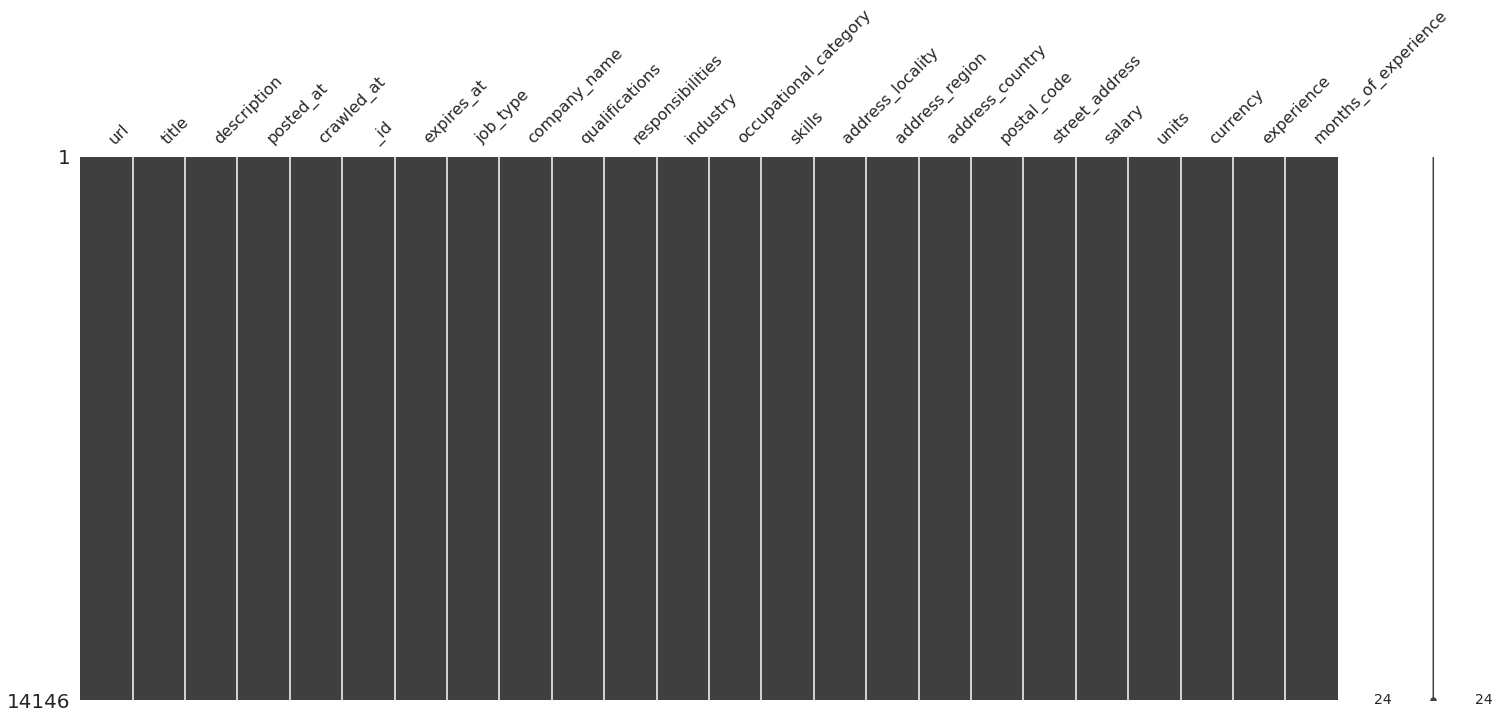

In [139]:
msno.matrix(df_work)

In [140]:
sum(df_work.isnull().sum())

0

In [141]:
percent_missing_work = df_work.isnull().sum() * 100 / len(df_work)
missing_value_df_work = pd.DataFrame({'Columnas': df_work.columns,
                                      'Porcentaje_Missing': percent_missing_work})
missing_value_df_work.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
url,url,0.0
title,title,0.0
experience,experience,0.0
currency,currency,0.0
units,units,0.0
salary,salary,0.0
street_address,street_address,0.0
postal_code,postal_code,0.0
address_country,address_country,0.0
address_region,address_region,0.0


Concluimos que no existen valores nulos en el dataset

####Borrado de duplicados

In [142]:
print(missing_value_df_work.shape)
missing_value_df= missing_value_df_work.drop_duplicates()
print(missing_value_df_work.shape)

(24, 2)
(24, 2)


Concluimos que no existen valores duplicados en el dataset

##Cantidad de habitantes por ciudad

###Lectura de archivos

In [143]:
url='https://raw.githubusercontent.com/leoomc97/datasets_CoderHouse/main/in.json'
respuesta=requests.get(url)
print(respuesta)

<Response [200]>


In [144]:
texto = respuesta.text
json.loads(texto)

[{'city': 'Mumbai',
  'admin': 'Mahārāshtra',
  'country': 'India',
  'population_proper': '12691836',
  'iso2': 'IN',
  'capital': 'admin',
  'lat': '18.987807',
  'lng': '72.836447',
  'population': '18978000'},
 {'city': 'Delhi',
  'admin': 'Delhi',
  'country': 'India',
  'population_proper': '7633213',
  'iso2': 'IN',
  'capital': 'admin',
  'lat': '28.651952',
  'lng': '77.231495',
  'population': '15926000'},
 {'city': 'Kolkata',
  'admin': 'West Bengal',
  'country': 'India',
  'population_proper': '4631392',
  'iso2': 'IN',
  'capital': 'admin',
  'lat': '22.562627',
  'lng': '88.363044',
  'population': '14787000'},
 {'city': 'Chennai',
  'admin': 'Tamil Nādu ',
  'country': 'India',
  'population_proper': '4328063',
  'iso2': 'IN',
  'capital': 'admin',
  'lat': '13.084622',
  'lng': '80.248357',
  'population': '7163000'},
 {'city': 'Bengalūru',
  'admin': 'Karnātaka',
  'country': 'India',
  'population_proper': '5104047',
  'iso2': 'IN',
  'capital': 'admin',
  'lat': '12

In [145]:
jsondata = json.loads(texto)

In [146]:
df_hab = pd.DataFrame.from_dict(jsondata)
df_hab

,city,admin,country,population_proper,iso2,capital,lat,lng,population
0,Mumbai,Mahārāshtra,India,12691836,IN,admin,18.987807,72.836447,18978000
1,Delhi,Delhi,India,7633213,IN,admin,28.651952,77.231495,15926000
2,Kolkata,West Bengal,India,4631392,IN,admin,22.562627,88.363044,14787000
3,Chennai,Tamil Nādu,India,4328063,IN,admin,13.084622,80.248357,7163000
4,Bengalūru,Karnātaka,India,5104047,IN,admin,12.977063,77.587106,6787000
...,...,...,...,...,...,...,...,...,...
207,Calicut,Kerala,India,,IN,minor,11.248016,75.780402,
208,Kagaznāgār,Andhra Pradesh,India,,IN,minor,19.331589,79.466051,
209,Jaipur,Rājasthān,India,,IN,admin,26.913312,75.787872,
210,Ghandinagar,Gujarāt,India,,IN,admin,23.216667,72.683333,


In [147]:
df_hab.shape

(212, 9)

###Exploración del dataset

####Análisis de nulos

In [148]:
df_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               212 non-null    object
 1   admin              212 non-null    object
 2   country            212 non-null    object
 3   population_proper  212 non-null    object
 4   iso2               212 non-null    object
 5   capital            212 non-null    object
 6   lat                212 non-null    object
 7   lng                212 non-null    object
 8   population         212 non-null    object
dtypes: object(9)
memory usage: 15.0+ KB


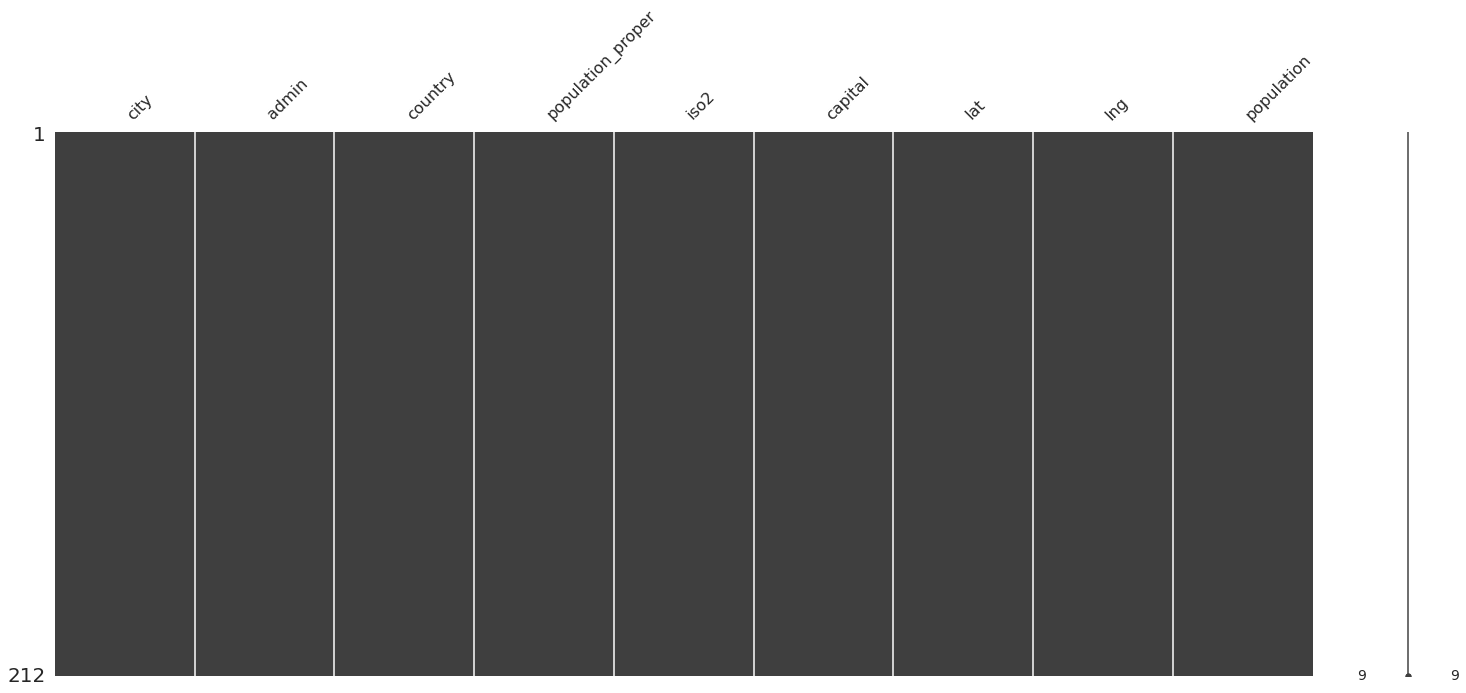

In [149]:
msno.matrix(df_hab)

In [150]:
sum(df_hab.isnull().sum())

0

In [151]:
percent_missing_hab = df_hab.isnull().sum() * 100 / len(df_hab)
missing_value_df_hab = pd.DataFrame({'Columnas': df_hab.columns,
                                     'Porcentaje_Missing': percent_missing_hab})
missing_value_df_hab.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
city,city,0.0
admin,admin,0.0
country,country,0.0
population_proper,population_proper,0.0
iso2,iso2,0.0
capital,capital,0.0
lat,lat,0.0
lng,lng,0.0
population,population,0.0


Concluimos que no existen valores nulos en el dataset

####Borrado de duplicados

In [152]:
print(missing_value_df_hab.shape)
missing_value_df= missing_value_df_hab.drop_duplicates()
print(missing_value_df_hab.shape)

(9, 2)
(9, 2)


Concluimos que no existen valores duplicados en el dataset

##Renta en la ciudad de Bangalore

###Lectura de archivos

In [153]:
url='https://raw.githubusercontent.com/leoomc97/datasets_CoderHouse/main/BHP.csv'
resp_rent=requests.get(url)
print(resp_rent)

<Response [200]>


In [154]:
rent = pd.read_csv(url)

In [155]:
df_rent = pd.DataFrame(rent)
df_rent.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


###Exploración del dataset

####Borrado de duplicados

In [156]:
print(df_rent.shape)
df_rent = df_rent.drop_duplicates()
print(df_rent.shape)

(13320, 9)
(12791, 9)


####Análisis de nulos

In [157]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


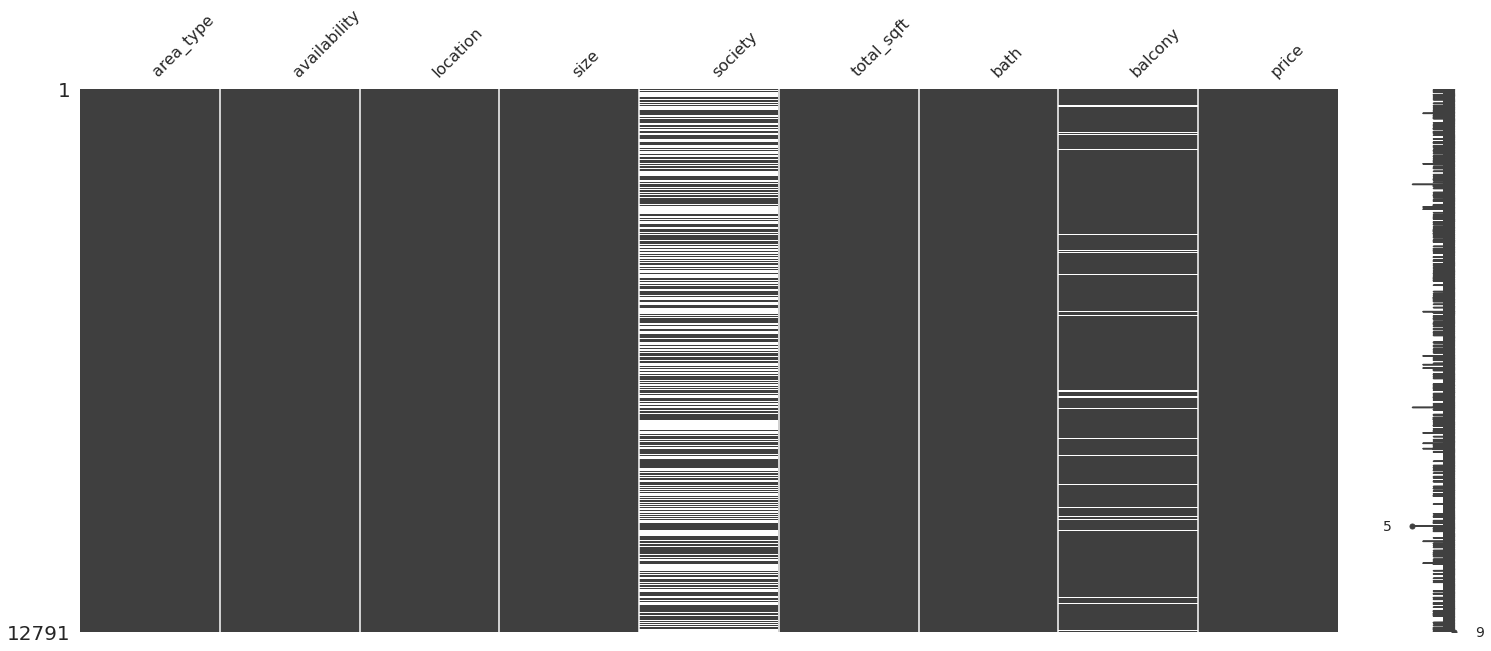

In [158]:
msno.matrix(df_rent)

Podemos observar rápidamente que existen datos nulos en las columnas "society" y "balcony", y apenas unos pocos nulos en "size", "bath" y "Location".

In [159]:
sum(df_rent.isnull().sum())

6023

In [160]:
percent_missing = df_rent.isnull().sum() * 100 / len(df_rent)
missing_value_df_rent = pd.DataFrame({'Columnas': df_rent.columns,
                                      'Porcentaje_Missing': percent_missing})
missing_value_df_rent.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
society,society,41.654288
balcony,balcony,4.729888
bath,bath,0.570714
size,size,0.125088
location,location,0.007818
area_type,area_type,0.000000
availability,availability,0.000000
total_sqft,total_sqft,0.000000
price,price,0.000000


<Figure size 1080x360 with 0 Axes>

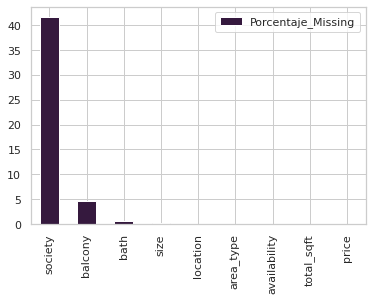

In [161]:
plt.figure(figsize=(15,5))
missing_value_df_rent.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "society" con el 42% de los mismos. Por lo tanto, seguramente sea una característica a eliminar o aplicar alguna técnica de reemplazo.

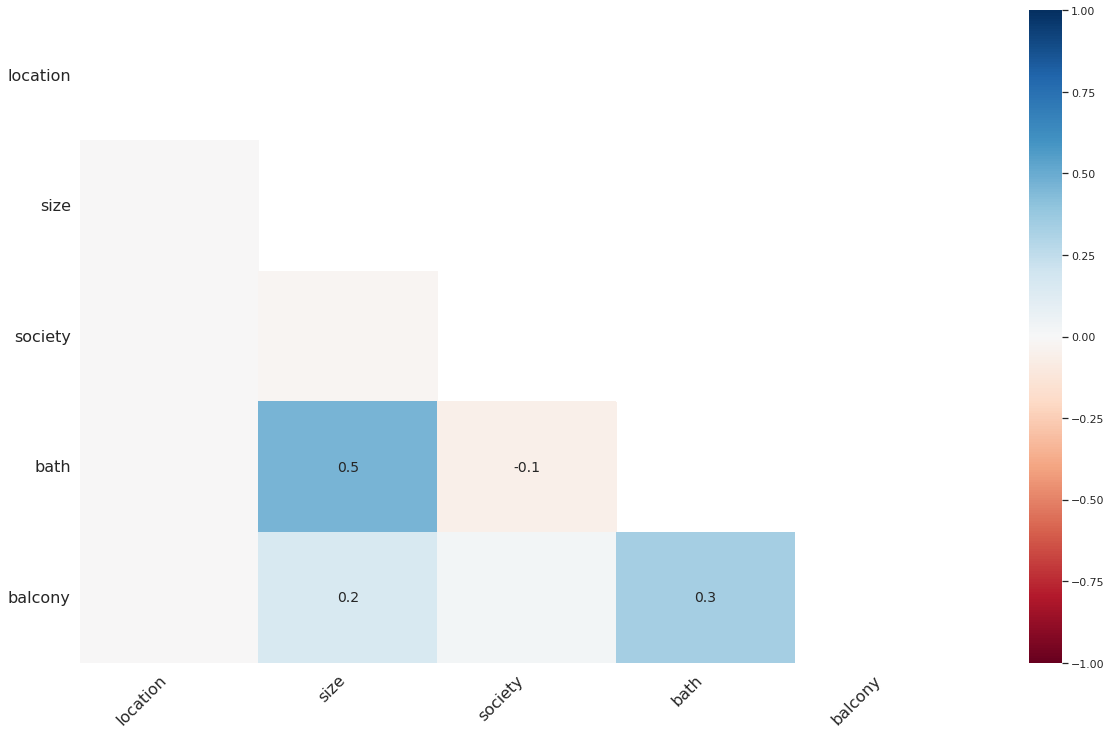

In [162]:
msno.heatmap(df_rent)

Finalmente podemos observar que no hay ninguna correlación entre las distintas características del dataset que poseen datos nulos.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con ellos:

In [163]:
df_rent.location.value_counts()

Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

In [164]:
df_rent['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

In [165]:
df_rent.society.value_counts()

GrrvaGr    68
PrarePa    63
Sryalan    56
Prtates    54
GMown E    52
           ..
AcisePa     1
Madener     1
Siilka      1
Tepleee     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

Decisión: Borrar por la falta de datos relevantes

In [166]:
df_rent.bath.value_counts()

2.0     6546
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

Decisión: Aplicar alguna técnica de interpolación

In [167]:
df_rent.balcony.value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

Decisión: Aplicar alguna técnica de interpolación

####Borrado de columnas

In [168]:
col_del=['society'] #Columnas a borrar que no aportan
col_inter=['balcony', 'bath'] #Columnas a interpolar
col_cat=['location', 'size'] #Columnas categóricas

#borrar variables
df_rent=df_rent.drop(labels=col_del, axis=1)

df_rent.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

####Llenar con la mediana

In [169]:
#reemplazar con la mediana en las columnas numericas que estén vacias
for i in col_inter:
  df_rent[i] = df_rent[i].fillna(df_rent[i].median())

df_rent[col_inter].isnull().sum()

balcony    0
bath       0
dtype: int64

Podemos observar que ya no hay datos nulos en ambas variables numericas.

####Llenar con la catergoría "Desconocido"

In [170]:
#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df_rent[i] = df_rent[i].fillna('Desconocido')

df_rent['location'].value_counts().sum()

12791

In [171]:
df_rent['size'].value_counts().sum()

12791

In [172]:
df_rent.shape

(12791, 8)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

###Verificando que no hay datos nulos

In [173]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  object 
 4   total_sqft    12791 non-null  object 
 5   bath          12791 non-null  float64
 6   balcony       12791 non-null  float64
 7   price         12791 non-null  float64
dtypes: float64(3), object(5)
memory usage: 899.4+ KB
